# Import Libraries

In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten

# Load Dataset

In [45]:
x_train = np.loadtxt("/kaggle/input/cats-dogs-dataset/input.csv" , delimiter = ",")
y_train = np.loadtxt("/kaggle/input/cats-dogs-dataset/labels.csv" , delimiter = ",")

x_test = np.loadtxt("/kaggle/input/cats-dogs-dataset/input_test.csv" , delimiter = ",")
y_test = np.loadtxt("/kaggle/input/cats-dogs-dataset/labels_test.csv" , delimiter = ",")

In [46]:
x_train = x_train.reshape(len(x_train) , 100 , 100 , 3)
y_train = y_train.reshape(len(y_train) , 1)

x_test = x_test.reshape(len(x_test) , 100 , 100 , 3)
y_test = y_test.reshape(len(y_test) , 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [47]:
print("The Shape of x_train" , x_train.shape)
print("The Shape of y_train" , y_train.shape)
print("The Shape of x_test" , x_test.shape)
print("The Shape of y_test" , y_test.shape)

The Shape of x_train (2000, 100, 100, 3)
The Shape of y_train (2000, 1)
The Shape of x_test (400, 100, 100, 3)
The Shape of y_test (400, 1)


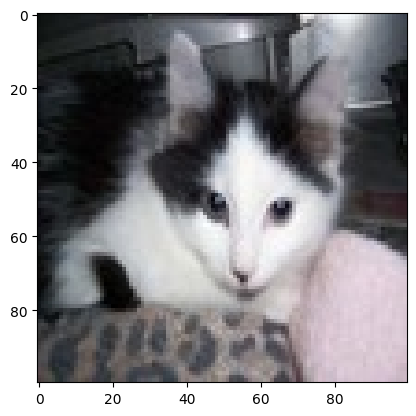

In [48]:
idx = random.randint(0 , len(x_train))
plt.imshow(x_train[idx , :]);

# CNN Model 

In [49]:
model = Sequential([
    Conv2D(32 , (3,3) , activation = "relu" , input_shape = (100 , 100 , 3)),
    MaxPooling2D((2 , 2)),
    
    Conv2D(32 , (3,3) , activation = "relu"),
    MaxPooling2D((2 , 2)),
    
    Flatten(),
    Dense(64 , activation = "relu"),
    Dense(1 , activation = "sigmoid")
])

In [50]:
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [51]:
model.fit(x_train , y_train , epochs = 5 , batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 370ms/step - accuracy: 0.5110 - loss: 0.7104
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 353ms/step - accuracy: 0.6321 - loss: 0.6529
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 367ms/step - accuracy: 0.6672 - loss: 0.5930
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 351ms/step - accuracy: 0.6880 - loss: 0.5762
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 368ms/step - accuracy: 0.7724 - loss: 0.4841


In [52]:
model.evaluate(x_test , y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7848 - loss: 0.4633


[0.6075116991996765, 0.6899999976158142]

# Making Predictions

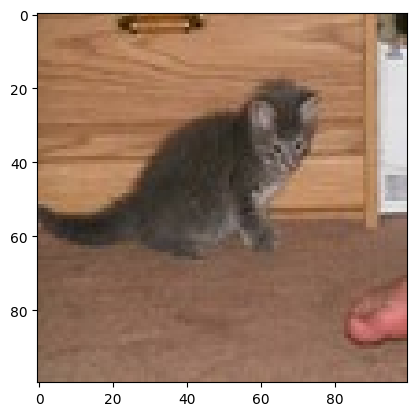

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
My model say this is a :  Cat


In [54]:
idx2 = random.randint(0 , len(y_test))
plt.imshow(x_test[idx2 , :])
plt.show()
y_pred = model.predict(x_test[idx2 , :].reshape(1 , 100 , 100 , 3))
y_pred = y_pred > 0.5

if y_pred == 0:
    pred = "Dog"
else:
    pred = "Cat"
    
print("My model say this is a : " , pred)